## Importing all necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



## Implementing k-means clustering from scratch:

#### Finding the nearest centroid to each point and allocate the point to that centroid

In [4]:
def SearchNearestCentroid(X, centroids):    # x is the input points' coordinates, centroids is the coordinates of centroids
    arr = np.zeros((X.shape[0]))   #array containing the indexes of centroid to which each point is allocated
    for i in range(X.shape[0]):
        norm = []    # array to hold the 2nd norm between the points and respective centroids
        for j in range(centroids.shape[0]):
            ijNorm = np.linalg.norm(X[i]-centroids[j])
            norm.append(ijNorm)
        arr[i] = np.argmin(norm)

    return arr

#### Computing the mean of the points allocated to each centroid so that each centroid can be relocated

In [5]:
def ComputeMean(X, arr, i) :#i is centroids.shape[0]
    m, n = X.shape
    centroids = np.zeros((i, n))

    for k in range(i):   
        points = X[arr == k]  
        centroids[k] = np.mean(points, axis = 0)    
    return centroids


#### Running this on a sample dataset:



In [43]:
def KMeans(X, initial_centroids, max_iters):
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = SearchNearestCentroid(X, centroids)
        
        # Given the memberships, compute new centroids
        centroids = ComputeMean(X, idx, K)
    plt.show() 
    
    return centroids, idx

def kMeans_init_centroids(X, K): #Initialize the coordinates of centroids
    randidx = np.random.permutation(X.shape[0])
    # Take the first K values as centroids
    centroids = X[randidx[:K]]
    
    return centroids

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


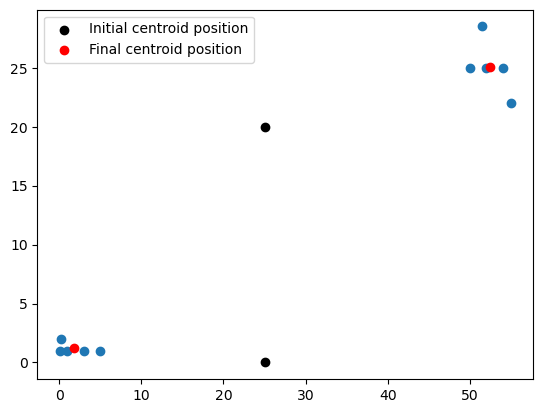

In [56]:
x = np.array([[1,1],[0.1,1], [0.2,2],[5,1],[3,1],[50,25],[51.5,28.5],[54,25],[52,25],[55,22]]) #random data points
init = np.array([[25,0],[25,20]])
idx , centroids = KMeans(x,init,10)
plt.scatter(*zip(*x))
plt.scatter(*zip(*init),color = 'black',label = 'Initial centroid position')
plt.scatter(*zip(*idx), color = 'red', label ='Final centroid position')
plt.legend()

The clustering implemented is correct

### Image compression using K-means:

In a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
Our image contains thousands of colors, and in this part I will reduce the number of colors to 16 colors.
By making this reduction, it is possible to represent (compress) the photo in an efficient way.
Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space.
Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.

In [32]:
ogimage = plt.imread('cat.jpg')  #source- https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.vecteezy.com%2Ffree-photos%2Fcat&psig=AOvVaw2_r4DgAelcX_lSBR_D0pfH&ust=1673157964060000&source=images&cd=vfe&ved=0CA8QjRxqFwoTCICEiaPltPwCFQAAAAAdAAAAABAE

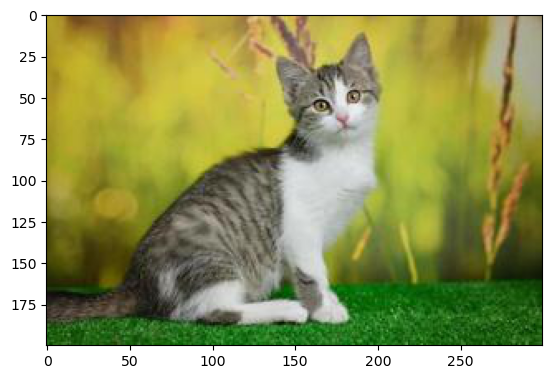

In [36]:

plt.imshow(ogimage)

In [39]:
imshape = ogimage.shape
print("Shape of the cat image is:", imshape)

Shape of the cat image is: (200, 300, 3)


To run k means clustering, you need to first transform the matrix into a two-dimensional matrix.

In [41]:
ogimage = ogimage / 255  #regularization of each pixel
X_img = np.reshape(ogimage, (ogimage.shape[0] * ogimage.shape[1], 3))
X_img

array([[0.00266052, 0.00239908, 0.00064591],
       [0.00267589, 0.00241446, 0.00066128],
       [0.00270665, 0.00239908, 0.00063053],
       ...,
       [0.00049212, 0.0014456 , 0.0002922 ],
       [0.00056901, 0.00152249, 0.00036909],
       [0.00056901, 0.00152249, 0.00039985]])

In [46]:
k = 16
iterations = 10
initial_centroids = kMeans_init_centroids(X_img, k) 
centroids, idx = KMeans(X_img, initial_centroids, iterations) 

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [51]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])
print(idx)
idx = idx.astype(int)

Shape of idx: (60000,)
Closest centroid for the first five elements: [14. 14. 14. 14. 14.]
[14. 14. 14. ...  3.  3.  3.]


In [53]:
# Represent image in terms of indices
X_new = centroids[idx, :] 
# Reshape recovered image into proper dimensions
X_new = np.reshape(X_new, ogimage.shape) 

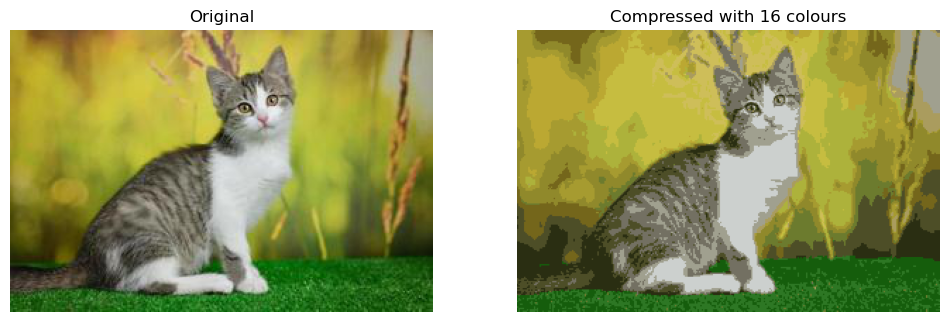

In [55]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(12,8))
plt.axis('off')

ax[0].imshow(ogimage*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_new*255)
ax[1].set_title('Compressed with %d colours'%16)
ax[1].set_axis_off()

Computing the amount of compression:

The original image required 24 bits for each one of the  300x200  pixel locations, resulting in total size of  $300 \times 200 \times 24= 1440000 $ bits.

The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location.
The final number of bits used is therefore $16 \times 24 + 300 \times 200 \times 4 = 240384$ bits, which corresponds to compressing the original image by about a factor of 6.

In [59]:
times_compressed = 1440000/240384
print(times_compressed)


5.9904153354632586


The image size has decreased $6$ fold